<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/stock/trend(LinReg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Define the list of assets (stock tickers)
tickers = ['ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS',
           'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS',
                   'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS',
                   'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS',
                   'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS',
                   'IOC.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS',
                   'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS',
                   'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS',
                   'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS',
                   'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS']
# Define the time period for data retrieval
start_date = '2021-01-01'
end_date = '2024-10-30'

# Download adjusted closing price data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Drop any rows with missing data
data = data.dropna()

# Initialize a list to store results
results_list = []

# Loop through each ticker to estimate trend and volatility
for ticker in tickers:
    # Get the price data for the current ticker
    price = data[ticker]

    # Convert the dates to ordinal numbers for regression (required for numerical computation)
    x = price.index.map(pd.Timestamp.toordinal)
    y = price.values

    # Add a constant term to the independent variable for the regression intercept
    x_with_const = sm.add_constant(x)

    # Fit a linear regression model (Ordinary Least Squares)
    model = sm.OLS(y, x_with_const)
    res = model.fit()

    # Extract the slope (trend) and standard error from the regression results
    trend = res.params[1]
    std_err = res.bse[1]
    p_value = res.pvalues[1]
    snr = trend / std_err  # Signal-to-Noise Ratio

    # Append the results to the list
    results_list.append({
        'Ticker': ticker,
        'Trend': trend,
        'Std_Err': std_err,
        'P_Value': p_value,
        'SNR': snr
    })

    # Optional: Print the results for the current ticker
    print(f"Ticker: {ticker}")
    print(f"Estimated Trend (Slope): {trend}")
    print(f"Trend Volatility (Standard Error): {std_err}")
    print(f"P-value: {p_value}")
    print(f"Signal-to-Noise Ratio (SNR): {snr}")
    print("-" * 40)

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Set the p-value threshold for statistical significance
p_value_threshold = 0.05

# Filter stocks with statistically significant trends
significant_stocks = results_df[results_df['P_Value'] < p_value_threshold]

# Sort the significant stocks by Signal-to-Noise Ratio in descending order
sorted_stocks = significant_stocks.sort_values(by='SNR', ascending=False)

# Select the top N stocks based on the criteria
top_N = 5  # You can adjust N as needed
top_stocks = sorted_stocks.head(top_N)

# Display the top stocks
print("\nTop Stocks Based on Highest Signal-to-Noise Ratio:")
print(top_stocks[['Ticker', 'Trend', 'Std_Err', 'P_Value', 'SNR']])



[*********************100%***********************]  49 of 49 completed


Ticker: ADANIPORTS.NS
Estimated Trend (Slope): 0.5303800151430298
Trend Volatility (Standard Error): 0.014166398779719296
P-value: 1.0280160433144414e-188
Signal-to-Noise Ratio (SNR): 37.43929726885319
----------------------------------------
Ticker: ASIANPAINT.NS
Estimated Trend (Slope): 0.2203359565099774
Trend Volatility (Standard Error): 0.01944511638412776
P-value: 5.406162583834136e-28
Signal-to-Noise Ratio (SNR): 11.331171907504164
----------------------------------------
Ticker: AXISBANK.NS
Estimated Trend (Slope): 0.40258760196448773
Trend Volatility (Standard Error): 0.0059274397632955046
P-value: 0.0
Signal-to-Noise Ratio (SNR): 67.91930716148845
----------------------------------------
Ticker: BAJAJ-AUTO.NS
Estimated Trend (Slope): 4.945297677066673
Trend Volatility (Standard Error): 0.11214838894148996
P-value: 2.234875216828466e-231
Signal-to-Noise Ratio (SNR): 44.09602067174352
----------------------------------------
Ticker: BAJAJFINSV.NS
Estimated Trend (Slope): 0.3223

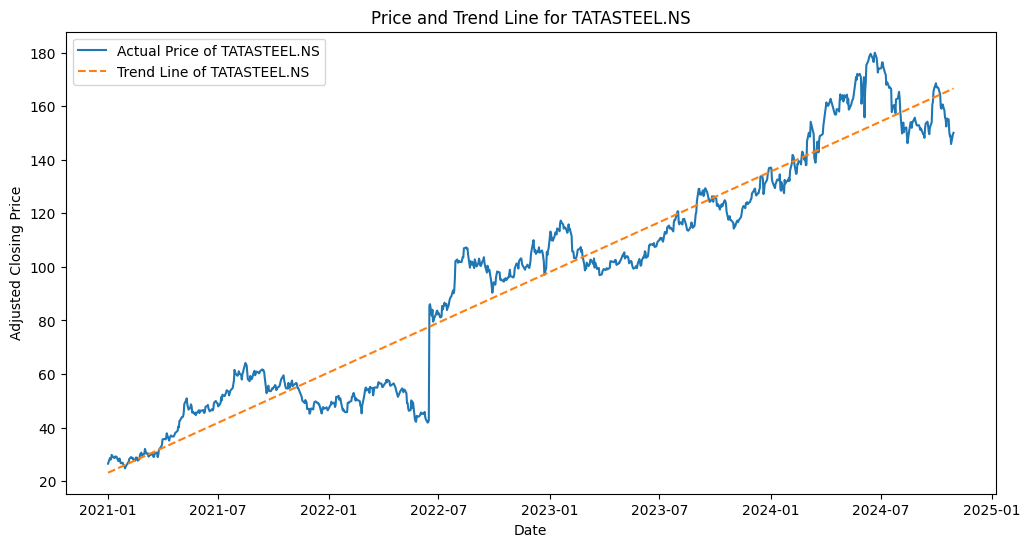

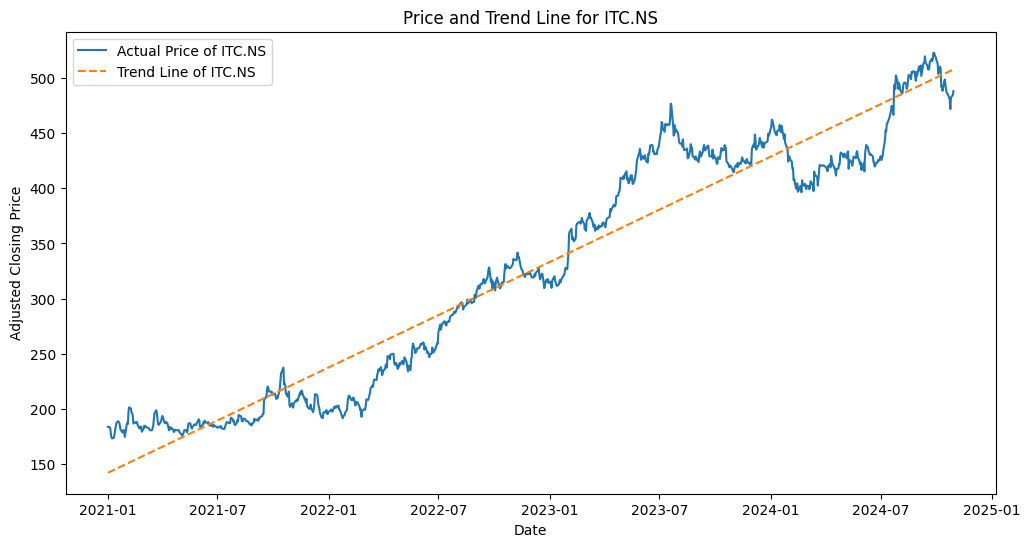

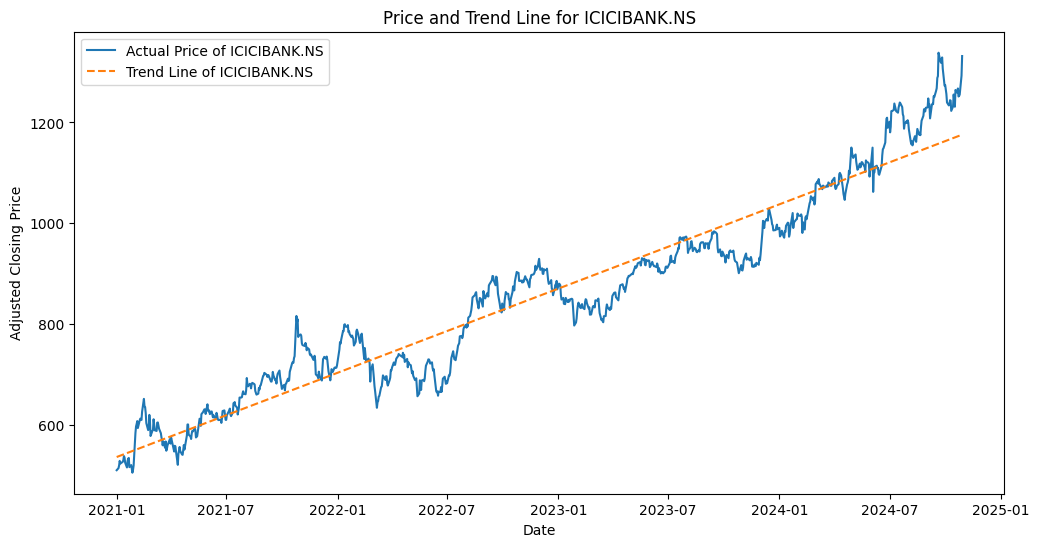

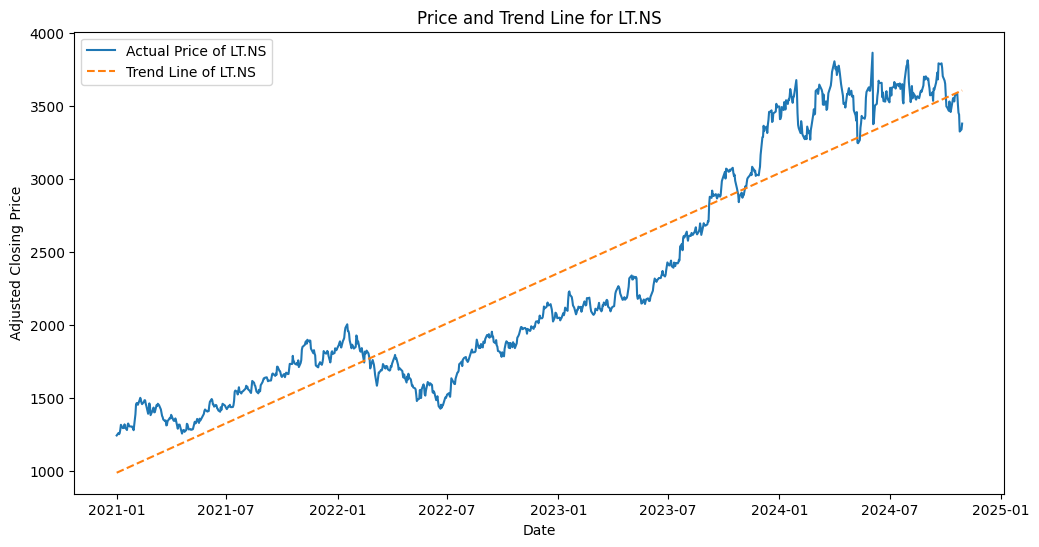

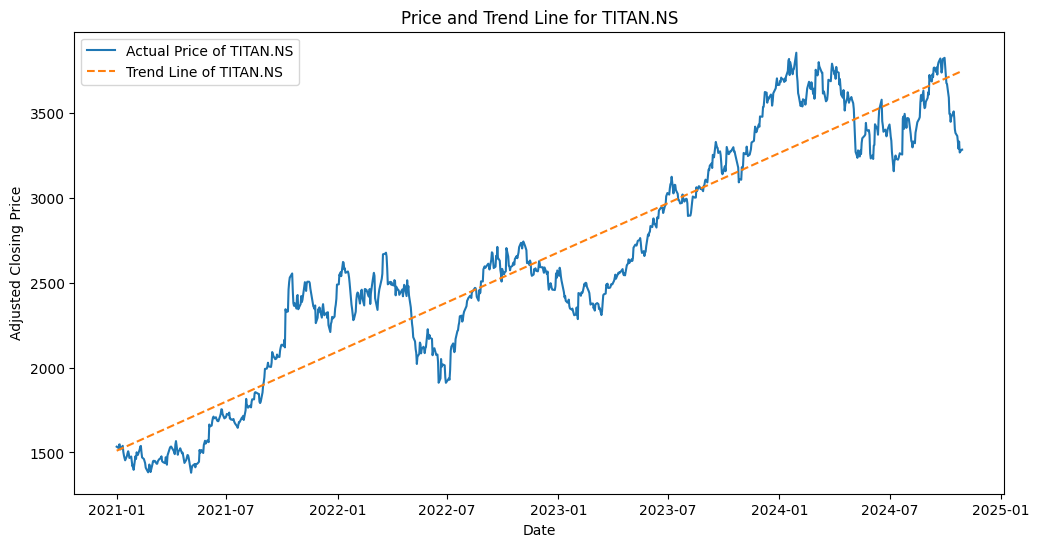

In [5]:

# Optionally, plot the price data and the fitted trend line for each top stock
for ticker in top_stocks['Ticker']:
    # Get the price data and regression model
    price = data[ticker]
    x = price.index.map(pd.Timestamp.toordinal)
    x_with_const = sm.add_constant(x)
    y = price.values
    model = sm.OLS(y, x_with_const)
    res = model.fit()
    fitted_values = res.predict(x_with_const)

    # Plot the actual price and the fitted trend line
    plt.figure(figsize=(12, 6))
    plt.plot(price.index, price.values, label=f'Actual Price of {ticker}')
    plt.plot(price.index, fitted_values, label=f'Trend Line of {ticker}', linestyle='--')
    plt.title(f'Price and Trend Line for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Closing Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


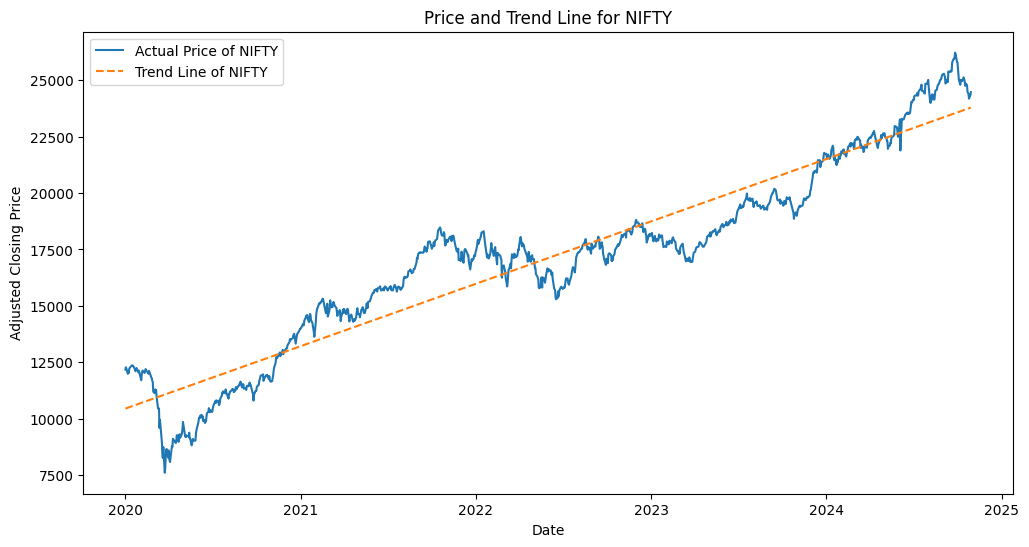

In [8]:
# Get the price data and regression model
price = yf.download('^NSEI', start='2020-01-01', end=end_date)['Adj Close']
x = price.index.map(pd.Timestamp.toordinal)
x_with_const = sm.add_constant(x)
y = price.values
model = sm.OLS(y, x_with_const)
res = model.fit()
fitted_values = res.predict(x_with_const)

# Plot the actual price and the fitted trend line
plt.figure(figsize=(12, 6))
plt.plot(price.index, price.values, label=f'Actual Price of NIFTY')
plt.plot(price.index, fitted_values, label=f'Trend Line of NIFTY', linestyle='--')
plt.title(f'Price and Trend Line for NIFTY')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()